# Class: STATS 507
Professor: Keith, Levin 

Student: Martin, Zanaj, mzanaj@umich.edu

Homework 7

I have not disclosed my code with no additional individual. 

In [6]:
#Question 1, ~3 hours
#1. 
#Use urllib to open the  link 
import urllib.request
html = urllib.request.urlopen('http://www.greenteapress.com/thinkpython/code/words.txt').read()

#Removes all the shlashes & puts in a readable format
s= html.decode('ASCII', 'strict') 

#Transform into list
l = list(s.split())

#Number of total elements 
#There are 113809 words 
#print(len(l))

#2. The data seems to be fine. One word for each position in the list. All of the data seem to be words.
#The data is in alphabetical order. No erraneous data. There are words that are not from the English vocab
#like "Ciao".

#3. Create a regular expression
import re
#pattern & compile (becomes an object) re.IGNORECASE
#first can be empty or any char, [vowel][vowel][vowel], can be anything 
pat = r'[^aeiou]*[aeiou][aeiou][aeiou][^aeiou]*'
three_consecutive_vowels = re.compile(pat)

#.search will look for strings that have the pattern 
the_list = [x for x in l if three_consecutive_vowels.search(x)]

#There are 1375 words with this pattern
#Test
#print(len(the_list))
#print(the_list)


#4. Serach for words withhout the word e
#beginning to end no e & as long as needed
pat2 = r'^[^e]*$'
gadsby  = re.compile(pat2)

the_list2 = [x for x in l if gadsby.search(x)]

#There are 37641 words without an e in them
#print(len(the_list2))

#5. For this one I have created 2 different Reguarl expression
#I understand that there must be only one regualar expression
#Perhaps, partial credit, could be awarded, but that is merely a suggestion :)

# consontat vowel consontant 
pat3 = r'^([^aeiouy]){1,1}[aeiou]*([^aeiouy])$'
consonant_consonant  = re.compile(pat3)

#words with matching first and last letters
pat4 = r'^(.).*\1$'
prova = re.compile(pat4)

#All words with pattern3
the_list3 = [x for x in l if consonant_consonant.search(x)]

#Allwords in pattern3 with matching first and last letter
the_list4 = [x for x in the_list3 if prova.search(x)]

#The list of words that have no duplicates but keep pattern3
the_list5= list(set(the_list3) - set(the_list4))

#print(len(the_list5))
#There are 1048 words with the pattern constant vowel  constant

#6. 
# consontat vowel consontant 
#All words AB **** BA, ABB
pat5 = r'^[a-z]([a-z])\1$|^([a-z])([a-z])[a-z]*\3\2$'
bookends = re.compile(pat5)
the_list6= [x for x in l if bookends.search(x)]

#print(len(the_list6))
#There are about 880 different words with the pattern AB - BA & ABB
#I have not included letters with 1 & 2 letters because they do not
#fulfill the requirement of having a third letter. Hence,I left them out. 


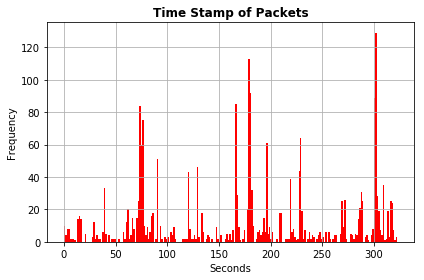

In [7]:
#Question 2, ~3 hours
#1. 
#Use urllib to open the  link 
import urllib.request
html = urllib.request.urlopen('http://umich.edu/~klevin/teaching/Fall2019/STATS507/SkypeIRC.txt').read()

#Removes GARABGE data & puts in a readable format
s= html.decode('UTF-8', 'strict') 
word = ""
n_packets = 0
list_words = []

#Loop through each character and group characters in the same line [each separate packet]
for x in range(265800):
    word = word+s[x]
    if(s[x] == '\n'):
        list_words.append(word)
        word = ""
        n_packets = n_packets+1

#There are about 2263 total packets
#print("Total is:" , n_packets) 

#2. 
import re
#Regular expression pattern,tried most of them there are slight variations, picked the one that makes most sense to me.
#PATTERN
pat = r'\b(25[0-4]|2[0-4][0-9]|1[0-9][0-9]|0[0-9][0-9]|[0-9][0-9]|[0-9])\.(25[0-4]|2[0-4][0-9]|1[0-9][0-9]|0[0-9][0-9]|[0-9][0-9]|[0-9])\.(25[0-4]|2[0-4][0-9]|1[0-9][0-9]|0[0-9][0-9]|[0-9][0-9]|[0-9])\.(25[0-4]|2[0-4][0-9]|1[0-9][0-9]|0[0-9][0-9]|[0-9][0-9]|[0-9])\b'
ip_regex = re.compile(pat)

#Split data into individual words
all_data = s.split()

#Check each element in the list,if it matches the regex
the_list = [x for x in all_data if ip_regex.search(x)]

#Sets have unique elements (nice shortcut)
ip_addresses = len(set(the_list))

#There are about 370 Ip Addresses 
#Test
#print(ip_addresses)

#HARDER WAY TO DO THINGS, didn't realize that I had the data in  a nice format, but could come useful somewhere else.
#list_of_all_regex = []
# #Check each line
# for x in range(len(list_words)):
    
#     #Split all contents of line into list objects 
#     prova = list(list_words[x].split())
    
#     #search for strings that have the pattern AAA.BBB.CCC.DDD
#     the_list = [x for x in prova if ip_regex.search(x)]
    
#     #Save results to a permanent list
#     for y in the_list:
#         list_of_all_regex.append(y)
        
# #Check for unique IP addresses 
# unique_list = []

# flag =1
# for x in list_of_all_regex:
#     for y in  range(flag,len(list_of_all_regex)-1):
#         if(x != list_of_all_regex[y]):
#             continue
#         else:
#             break 
#     unique_list.append(x)
#     flag = flag+1
# print(len(list_of_all_regex))
# print(len(set(list_of_all_regex)))

#3.
def get_packets_by_regex(user_input):
    #Check is str
    if(type(user_input) is not str):
        raise TypeError("Please, ensure that the input is of type string")
        
    #Set pattern for Regular expression
    pat = (user_input)
    regex = re.compile(pat)   
    
    #Look for matches 
    the_list= [x for x in list_words if regex.search(x)]
    
    #I am just returning a list with all the lines as separate objects (I assume it is fine)
    return(the_list)

#Test
#get_packets_by_regex(r'comcast') 

#Simple Example
# pat = r'test'
# regex = re.compile(pat)  
# lala = ['hello test ','hello', 'test']
# the_list= [x for x in lala if regex.search(x)]
# print(the_list)

#Testing code with a simple file 
#This is the file
# f = open("./test.txt")    
# # p = f.readlines()
# # print(p)
# user_input  = 'comcast'
# pat = (r'comcast')
# regex = re.compile(pat)

# #The problem is having everthing in a line
# #Check all elements of line
#     #if match return line
#     #if no match go to next line 

# the_list= [x for x in list_words if regex.search(x)]

#4.Create A nice plot 
#This was my favourite: you apply a regular expression (not some complicated nonsense), you get all matching results
#you plot the results, and get an idea of the data (topics from previous hw). This is a good question
import numpy as np
import matplotlib as mp
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
%matplotlib inline

#Read time stamps (a regular expression should help)
pattern= r'^([0-9][0-9][0-9]|[0-9][0-9]|[0-9])\.([0-9][0-9][0-9][0-9][0-9][0-9])$'
regex2 = re.compile(pattern)

#All words with pattern3 (conver x from str to float~ tricky!)
my_list = [float(x) for x in all_data if regex2.search(x)]

#Graph Info
plt.title("Time Stamp of Packets", fontweight = 'bold')
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.grid()

#Bins & Plot
num = int(len(my_list)/10)
plt.hist(my_list, bins = num, facecolor = 'red')

_= plt.tight_layout()

#Sava image to  a pdf
fname= 'timestamps.pdf'
plt.savefig(fname, dpi=None, facecolor='w', edgecolor='w',orientation='portrait')

In [8]:
#Question 3, ~ 2 hours
#1. 
import urllib.request
import re
from bs4 import BeautifulSoup

#Read url
website= urllib.request.urlopen('https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan').read()   

#Parse it
soup = BeautifulSoup(website, 'html.parser')

#Find correct tag ('wikitable collapsible', from html)
tag= soup.find("table", { "class" : "wikitable collapsible" }) 

#General info about structure of node
#print(tag.name)
#print(tag.attrs)
#print(len(tag.contents))
#print(tag.contents[0].name)
#print(tag.contents[1].name)
#print(len(list(tag.children)))
#print(len(list(tag.descendants)))
attributes = []
for name in tag.descendants:
    if(name.name not in attributes and name.name is not None):
        attributes.append(name.name)
#print(attributes)

#The node (table, wikitable collapsible) seems to have 2 elements from contents.
#The first one turns out to be None (empty, non-existent). The second one 
#does indeed exist and it is called 'tbody'. There seem to be 649 descendants nodes.
#The set of attributes are ['tbody', 'tr', 'th', 'td', 'br', 'a', 'span', 'sup']

#2. 
import requests
import numpy as np
from requests.exceptions import HTTPError
from requests.exceptions import Timeout
from requests.exceptions import RequestException
from requests.exceptions import ConnectionError

def retrieve_climate_table(url):
    #Check url, str type
    if(type(url) is not str):
        raise TypeError("Plese, ensure that url is of type string")
    
    #Request possible errors
    try:
        #Read
        website= requests.get(url)
        #Check for errors
        website.raise_for_status()
    #Http 
    except requests.exceptions.HTTPError as httpEr:
        print(httpEr)
        return
    #Connection    
    except requests.exceptions.ConnectionError as connEr:
        print(connEr)
        return
    #Request Ex    
    except requests.exceptions.RequestException as reqEr:
        print(reqEr)
        return
    
    #Timeout   
    except requests.exceptions.Timeout as timeEr:
        print(timeEr)
        return
    except:
        raise ValueError("Error. Invalid url")
    
    #read
    website= urllib.request.urlopen(url).read()   

    #Parse it
    soup = BeautifulSoup(website, 'html.parser')

    #Get all tables
    tag_table = soup.find_all("table")

    #Look for climate table 
    pat= r'Climate data'
    reg= re.compile(pat)
    
    #Separate each table
    the_list = []
    for x in tag_table:
        p=x.encode('utf-8').decode('utf-8')
        if(reg.search(p)):
            the_list.append(p)
    #No table
    if(len(the_list)==0):
        return None
    
    #Return 1st table 
    else:
        #Convert to bs4 object 
        data = str(the_list[0])
        bs4 = BeautifulSoup(data, 'html.parser')
        return bs4

#Test 
#url = 'https://en.wikipedia.org/wiki/Los_Angeles'
#url = 'https://en.wikipedia.org/wiki/Bicycle'
#retrieve_climate_table(url)

#3.
def list_climate_table_row_names(url):
    #Get table
    the_table = retrieve_climate_table(url)
    
    if(the_table is None):
        return None
    else:
        #Get all rows in the table
        row_names = the_table.find_all('th', scope = 'row')
        
        #Get text (no html)
        the_list= []
        for x in row_names:
            #Remove html
            a= x.get_text()
            
            #Remove \n
            b = a.strip()
            
            #Text
            the_list.append(b)
            
        return the_list
    
#Test cases
#url = 'https://en.wikipedia.org/wiki/Los_Angeles'
#list_climate_table_row_names(url)

#4. 
#Take Url, check if valid else raise errror. (retrieve_climate_table)
#Check if there is a table, else return None (retrieve_climate_table)
#Check, that row is a valid input (str), else return None
#If there is a table, check if there is a row with the name, else return None (list_climate_table_row_names)
#If both row & table exist, look for tag tr (all rows), th (row info),td (all columns), and br (tag in between numbers)
#get text, and strip uneccessary data. Put in a list, and return list. 


In [9]:
#Question 4 (SQL), ~4 hours 
#In this question I made use of past structures (tuples, dict, list) and applied the SQL queries.
#There is a balance between new and old stuff, so as to practice and become a better programmer. 

#1. 
import sqlite3
#Connection object
conn = sqlite3.connect('./Chinook_Sqlite.sqlite')
#Cursor
c= conn.cursor()
#SQL select 
c.execute("select * from SQLite_master")
#Get data 
tables =c.fetchall()
#Iterate 
the_list = []
for x in tables:
    the_list.append(x[2])

n_tables = len(set(the_list))
#print(n_tables), 
#There are 11 tables 

#2.
#SQL select 
c.execute("select * from SQLite_master")
#Get data 
tables_2 =c.fetchall()
#Iterate 
the_list_2 = []
for x in tables_2:
    the_list_2.append(x[2])
table_names_2 = set(the_list_2)
#print(table_names_2)
#{'Employee', 'Genre', 'PlaylistTrack', 'Artist', 'Customer', 'Playlist', 'MediaType', 'Invoice', 'InvoiceLine', 'Album', 'Track'}

#3. 
def list_album_ids_by_letter(letter):
    #Check it is a letter
    if(type(letter) is not str ):
        raise TypeError("Please ensure that you have a char")
    #Check length
    if(len(letter) !=1):
        raise ValueError("Please ensure that you have one single char")
    #Lower case
    letter = letter.lower()
    
    #Select all elements of albums
    c.execute("select * from Album")
    
    #Get data 
    album =c.fetchall()
    the_list = []
    #Loop through every album name
    for name in album:
        #Check first character of album name, exit loop after 1 iteration (first char)
        for char in name[1]:
            #if match append id to list
            if(char.lower() == letter):
                the_list.append(name[0])
            break
    return the_list
#Test   
#letter = 'f'
#list_album_ids_by_letter(letter)
#[1, 7, 60, 88, 99, 163, 288, 322]

#4.
def list_song_ids_by_album_letter(letter):
    #Firts understand the table (primary keys and foreing keys )
    #Check album
    c.execute('select * FROM Album')
    structure = [x[0] for x in c.description]
    #Album = ['AlbumId', 'Title', 'ArtistId']
    
    #Check Track
    c.execute('select * FROM Track')
    structure = [x[0] for x in c.description]
    #Track =['TrackId', 'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice']
    
    #We understand, Album and Track can be joined through AlbumId. Hence, 
    
    #Select all track belonging to all albums
    c.execute ('select Album.AlbumId, Album.Title, Track.TrackId FROM Album, Track WHERE Album.AlbumId = Track.AlbumID')
    table = c.fetchall()
    
    #Get list of all albums with matching letter
    album_primary_key = list_album_ids_by_letter(letter)
    
    the_list = []
    #Loop through all albums that have matching letter
    for x in album_primary_key:
        #Get all the songs of that album
        for y in table:
            if(x == y[0]):
                the_list.append(y[2]) 
    return the_list
        
    
#Test   
#letter = 'f'
#list_song_ids_by_album_letter(letter)


#5. 
#MOdified(list_song_ids_by_album_letter)helper function
def helper(letter):
    #We understand, Album and Track can be joined through AlbumId. Hence, 
    
    #Select all track belonging to all albums
    c.execute ('select Album.AlbumId, Album.Title, Track.TrackId FROM Album, Track WHERE Album.AlbumId = Track.AlbumID')
    table = c.fetchall()
    
    #Get list of all albums with matching letter
    album_primary_key = list_album_ids_by_letter(letter)
    the_dict = dict()
    simple = []
    the_list = []
   # print("This are all of the albums",album_primary_key)

    #Loop through all albums that have matching letter
    for x in album_primary_key:
        #Get all the songs of that album
        for y in table:
            if(x == y[0]):
                simple.append(y[2])
                the_list.append(y[2]) 
        the_dict[x]= tuple(simple)
        simple = []
    #print("This are all of the tracks", the_list)
    #print("This is the dictionary", the_dict)
    return the_dict


def total_cost_by_album_letter(letter):
    #Find matching albums & Find matching Songs 
    #This is a dictionary with Albums : (trackId, trackId, ....)
    the_dict = helper(letter)
    
    #Get all of the tracks and their price
    c.execute ('select Track.TrackId, Track.UnitPrice FROM Track')
    table = c.fetchall()

    cost= 0
    #Loop through each album
    for album in the_dict:
        #Loop through each song of the album
        for song in the_dict[album]:
            #Loop through each element of the database
            for x in table:
                #Check for matching id
                if(x[0]==song):
                    #Get the cost 
                    cost= cost+x[1]
    return cost

    
#Test
#total_cost_by_album_letter('f')